## Define Model

In [1]:
import matplotlib
from keras import backend as K
K.set_image_dim_ordering('th')

Using Theano backend.
Using cuDNN version 5103 on context None
Preallocating 1502/2002 Mb (0.750000) on cuda0
Mapped name None to device cuda0: GeForce GTX 860M (0000:01:00.0)


In [2]:
#First Layer
from keras.models import Sequential
from keras.layers import ZeroPadding2D, Conv2D

model = Sequential()
model.add(ZeroPadding2D(padding=(1,1), input_shape=(3,224,224)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [3]:
#Second Layer
from keras.layers import MaxPooling2D

model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

In [4]:
#Third Layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))

In [5]:
#Fourth Layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

In [6]:
#Fifth Layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(256, (3,3), activation='relu'))

In [7]:
#Sixth Layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(256, (3,3), activation='relu'))

In [8]:
#Seventh Layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

In [9]:
#Eighth Layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(512, (3,3), activation='relu'))

In [10]:
#Ninth Layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(512, (3,3), activation='relu'))

In [11]:
#Tenth layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

In [12]:
#Eleventh layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(512,(3,3), activation='relu'))

In [13]:
#Twelveth Layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(512, (3,3), activation='relu'))

In [14]:
#Thirteenth Layer
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

In [15]:
#Flatten Outputs
from keras.layers import Flatten

model.add(Flatten())

In [16]:
#Fourteenth Layer
from keras.layers import Dense, Dropout

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

In [17]:
#Fifteenth Layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

In [18]:
#Final Layer
model.add(Dense(1000, activation='softmax'))

In [19]:
#Import past weights
from keras.optimizers import SGD, RMSprop, Adam

fname = 'fastai/models/vgg16.h5'
model.load_weights(fname)

model.pop()
for layer in model.layers: layer.trainable=False
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])

## Import the data

In [20]:
path='data/state-farm'
train_path=path+"/train"
valid_path=path+"/valid"

In [21]:
#Get data
from keras.preprocessing import image

gen = image.ImageDataGenerator()
batch_size=16

train_batches = gen.flow_from_directory(train_path, target_size=(224,224), class_mode='categorical', shuffle=True, batch_size=batch_size)
val_batches = gen.flow_from_directory(valid_path, target_size=(224,224), class_mode='categorical', shuffle=True, batch_size=batch_size)

classes = list(iter(train_batches.class_indices)) # get a list of all the class labels

for c in train_batches.class_indices:
    classes[train_batches.class_indices[c]] = c

Found 19924 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Fit the model

In [24]:
#Fit Model
model.load_weights('models/state_farm.h5')
model.fit_generator(train_batches, samples_per_epoch=train_batches.samples, epochs=1, validation_data=val_batches, validation_steps=val_batches.samples)

/home/callum/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=1, validation_data=<keras.pre..., steps_per_epoch=1245, validation_steps=2500)`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/1
 701/1245 [===============>..............] - ETA: 4:50 - loss: 1.5096 - acc: 0.6845

KeyboardInterrupt: 

In [25]:
model.save_weights('models/state_farm.h5')

## Examine Results

In [22]:
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
import matplotlib.pyplot as plt
#Use the plots helper function
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')



In [23]:
sample_batches = gen.flow_from_directory(train_path, target_size=(224,224), class_mode='categorical', shuffle=True, batch_size=4)

Found 19924 images belonging to 10 classes.


In [24]:
# Get a few images and their true labels
imgs, labels = next(sample_batches)
indxs = np.argmax(labels, axis=1)
indxs
labels = [classes[indx] for indx in indxs]
true_labels_dict = {
    'c0': 'safe driving',
    'c1': 'texting - right',
    'c2': 'talking on the phone - right',
    'c3': 'texting - left',
    'c4': 'talking on the phone - left',
    'c5': 'operating the radio',
    'c6': 'drinking',
    'c7': 'reaching behind',
    'c8': 'hair and makeup',
    'c9': 'talking to passenger',
}
true_labels = [true_labels_dict[label] for label in labels]

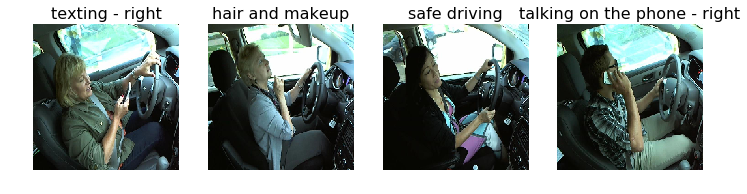

In [25]:
plots(imgs, titles=true_labels)

## Test Model

In [ ]:
model.load_weights('models/state_farm.h5')
batches = gen.flow_from_directory(path+'/test', target_size=(224,224), class_mode='categorical', shuffle=True, batch_size=20)
preds = []
for i in range(batches.samples):
    print i, '/', batches.samples
    ims, labs = batches.next()
    pred = model.predict(ims)
    if preds == []: preds = pred
    preds = np.append(preds, pred, axis=0)

Found 79726 images belonging to 1 classes.
0 / 79726
1 / 79726


/home/callum/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  


2 / 79726
3 / 79726
4 / 79726
5 / 79726
6 / 79726
7 / 79726
8 / 79726
9 / 79726
10 / 79726
11 / 79726
12 / 79726
13 / 79726
14 / 79726
15 / 79726
16 / 79726
17 / 79726
18 / 79726
19 / 79726
20 / 79726
21 / 79726
22 / 79726
23 / 79726
24 / 79726
25 / 79726
26 / 79726
27 / 79726
28 / 79726
29 / 79726
30 / 79726
31 / 79726
32 / 79726
33 / 79726
34 / 79726
35 / 79726
36 / 79726
37 / 79726
38 / 79726
39 / 79726


In [35]:
preds

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])